<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1>Logistic Regression Project</h1>
</div>

<img src="attachment:86546f93-aa15-44a3-bdb2-4e34340ee9d3.png" width="300" style="margin: 0 auto;">


For this project, we'll be working on the titanic dataset.

**Research Goal: We'd like to classify passengers of the titanic dataset so we could see if there is a way to predict who would have survived.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Part 1

Read the dataset (located at `../datasets/titanic.csv`) and do some exploratory analysis and data cleansing.

### Things to consider when data cleansing:
* What is some initial info we can obtain about the dataset?
* How many missing entries are in our dataset?
* What rows/columns do not contain enough information to be useful? 
  - A lot of information 
* For columns with nominal data, how many different categories are there? (hint: `df['column'].nunique`)
* For rows missing data, is there a way we can fill in that information using our dataset? 
  - For columns like age: consider plotting the histogram (easy way is `df['age'].hist()`) and checking if the data is normally distributed. If not, consider using `median` age as a replacement for missing data. You can go even further and group by `Pclass` and `Sex` in order to use more specific age values for median.
  - For passengers missing "embarked" data, try checking [this website](https://www.encyclopedia-titanica.org/titanic-survivor/) for the missing data.
  - For cabin, replace missing values with 'M'. You can take this further since upper cabins ('A', 'B', 'C') had a better chance at survival but we'll leave that as an optional task. 

### Things to consider when doing exploratory analysis.
* What is the shape of the dataset?
* What are the mean and median values for different columns? (hint: consider using boxplots to visualize this sort of information)
* What is the distribution of the data? (hint: consider using histograms to visualize this sort of information)
* What are the total numbers for different categories for columns? E.g.  For survived, what are the total numbers of passengers who survived vs who didn't survive? (hint: consider using bar charts to visualize this sort of information).

Column information is as follows:
<table>
  <tr>
    <th>variable</th>
    <th>definition</th>
    <th>key</th>
  </tr>
  <tr>
    <td>PassengerID</td>
    <td>ID given to passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Survived</td>
    <td>indicator if passenger survived</td>
    <td>0 = No, 1 = Yes</td>
  </tr>
  <tr>
    <td>Pclass</td>
    <td>Ticket Class</td>
    <td>1 = 1st, 2 = 2nd, 3 = 3rd</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>sex of passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Age</td>
    <td>age of passenger in years</td>
    <td></td>
  </tr>
  <tr>
    <td>Sibsp</td>
    <td># of passenger's siblings/spouses aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Parch</td>
    <td># of passenger's parents/children aboard</td>
    <td></td>
  </tr>
  <tr>
    <td>Ticket</td>
    <td>ticket number</td>
    <td></td>
  </tr>
  <tr>
    <td>Fare</td>
    <td>fare paid by passenger</td>
    <td></td>
  </tr>
  <tr>
    <td>Cabin</td>
    <td>cabin number</td>
    <td></td>
  </tr>
  <tr>
    <td>Embarked</td>
    <td>port of embarkation</td>
    <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
  </tr>
</table>

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
ages = df.groupby(["Pclass","Sex"])["Age"].median()#checking to see what the median would be
ages

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [4]:
#filling in Ages according to median age
df["Age"] = df.groupby(["Pclass", "Sex"], sort=False)["Age"].apply(lambda x:x.fillna(round(x.median())))

In [6]:
df["Embarked"] = df["Embarked"].fillna("M")

In [7]:
df['Cabin_Letter'] = df['Cabin'].str[0]
df['Cabin_Letter']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin_Letter, Length: 891, dtype: object

In [9]:
df["Cabin_Survival"] = df["Cabin_Letter"].apply(lambda x: 1 if x=='A' or x=='B' or x=='C' else 0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    float64
 6   SibSp           891 non-null    int64  
 7   Parch           891 non-null    int64  
 8   Ticket          891 non-null    object 
 9   Fare            891 non-null    float64
 10  Cabin           204 non-null    object 
 11  Embarked        891 non-null    object 
 12  Cabin_Letter    204 non-null    object 
 13  Cabin_Survival  891 non-null    int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


# Part 2

### Prepare our data for our logistic regression.
* Do one-hot encodings for our nominal data. One-Hot Encoding is a fancy way of turning nominal data (data that is categorical) into numerical data that we can use.
  - We did this with the heightsandweights dataset when we turned converted values for `Sex` into `0`s and `1`s. We must do it again for the `Sex` column in this dataset. 
  - For `Pclass`, make a one-hot-encoding for each passenger class (meaning created a column for 1st class and the values for that column should be 1 if the passenger was in 1st class or 0 otherwise). Do this for each possible value of `Pclass`.
* Remove columns that contain non-numerical data that we cannot use for our logistic regression.
* Make some initial charts to try to find relationships in our data to see if our logistic regression could work (doesn't always show 


In [11]:
values = {"male":0, "female":1}
df["Sex"] = df["Sex"].apply(lambda x: x ==values[x])

In [12]:
df["1st_class"] = df["Pclass"].apply(lambda x: 1 if x==1 else 0)

In [13]:
df["2nd_class"] = df["Pclass"].apply(lambda x: 1 if x==2 else 0)

In [14]:
df["3rd_class"] = df["Pclass"].apply(lambda x: 1 if x==3 else 0)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Letter,Cabin_Survival,1st_class,2nd_class,3rd_class
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C85,C,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,C123,S,C,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",False,27.0,0,0,211536,13.0000,NaN,S,NaN,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,112053,30.0000,B42,S,B,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,22.0,1,2,W./C. 6607,23.4500,NaN,S,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",False,26.0,0,0,111369,30.0000,C148,C,C,1,1,0,0


In [16]:
#The cabin column is missing too many values to be useful so I am dropping it. It also doesn't contain numerical data
df = df.drop("Cabin", axis=1)

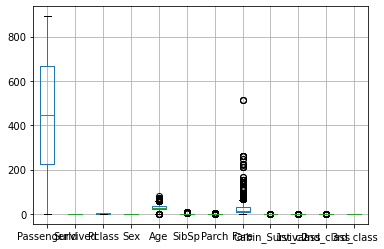

In [17]:
df.boxplot()

In [ ]:
plt.scatter(x=["Height", y="Sex", data= df1, c="blue",s=0.5, alpha=0.5,label="F")
plt.scatter(x="Height", y="Sex", data= df0, c="pink",s=0.5, alpha=0.5, label="M")
plt.suptitle("Scatter Plot of height/Sex Relationship")
plt.xlabel("Height")
plt.ylabel("Sex")
plt.legend(loc="best")
plt.show()

# Part 3 

### Doing our logistic regression
* For our LogReg, we can use all of the columns (after fixing them in the previous two parts) that contain numerical data. You can choose to use more or less if it improves your results. (hint: numerical columns, after clean up, could be `['Age', 'Sibsp', 'Parch', 'Fare', 'Sex', '1st Class', '2nd Class', '3rd Class']`)
* Make those columns from the previous bulletpoint be our Independent Variable
* For our dependent variable, use the column 'Survived'
* Once your `X`/`Y` values are figured  out, break your data up into training/test data using `train_test_split` and use 20% as test data. You will then have four variables with data (e.g. `X_train`, `x_test`, `Y_train` and `Y_test`) 
* Create an instance of the `LogisticRegression` class.
* Fit your logistic regression using the training data and that object from the previous bulletproof.
* Once a logistic regression is fitted, use the `x_test` values to generate predicted values of Y.
* Then use those predicted values of Y with the actual values of Y (`Y_test`) to generate a confusion matrix, a classification report, and the following metrics:
  - accuracy score
  - precision score
  - recall score
* Use any and all charts you're able to create to visualize your results (hint: you can use `sns.heatmap` to generate a visualization of the confusion matrix).

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Letter,Cabin_Survival,1st_class,2nd_class,3rd_class
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,S,NaN,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",False,38.0,1,0,PC 17599,71.2833,C,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",False,26.0,0,0,STON/O2. 3101282,7.9250,S,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",False,35.0,1,0,113803,53.1000,S,C,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,S,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",False,27.0,0,0,211536,13.0000,S,NaN,0,0,1,0
887,888,1,1,"Graham, Miss. Margaret Edith",False,19.0,0,0,112053,30.0000,S,B,1,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",False,22.0,1,2,W./C. 6607,23.4500,S,NaN,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",False,26.0,0,0,111369,30.0000,C,C,1,1,0,0


In [19]:
X = df[['Age', 'SibSp', 'Parch', 'Fare', 'Sex', '1st_class', '2nd_class', '3rd_class']] 
Y = df["Survived"]

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.25)

In [21]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression()

In [22]:
logReg.fit(x_train,y_train)

LogisticRegression()

In [23]:
y_preg = logReg.predict(x_test)

In [24]:
y_preg

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0])

In [ ]:
plt.scatter(x="Age", y="Survived", data=df c="blue",s=0.5, alpha=0.5,label="F")
# plt.scatter(, y="Sex", data= df0, c="pink",s=0.5, alpha=0.5, label="M")
plt.suptitle("Scatter Plot of height/Sex Relationship")
plt.xlabel("Height")
plt.ylabel("Sex")
plt.legend(loc="best")
plt.show()

In [25]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_preg)
cnf_matrix

array([[117,  14],
       [ 59,  33]])

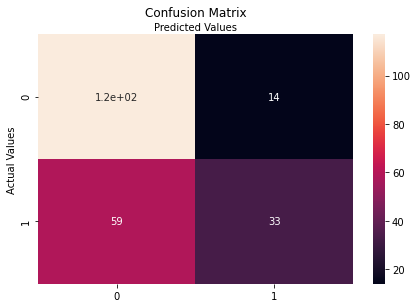

In [26]:
import seaborn as sns

survival_rate = [0,1]

fig, ax = plt.subplots()
tick_marks = np.arange(len(survival_rate))
plt.xticks(tick_marks, survival_rate)
plt.yticks(tick_marks, survival_rate)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preg))

              precision    recall  f1-score   support

           0       0.66      0.89      0.76       131
           1       0.70      0.36      0.47        92

    accuracy                           0.67       223
   macro avg       0.68      0.63      0.62       223
weighted avg       0.68      0.67      0.64       223



In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Accuracy: {accuracy_score(y_test, y_preg)}")
print(f"Precision: {precision_score(y_test,y_preg)}")
print(f"Recall: {recall_score(y_test,y_preg)}")

Accuracy: 0.672645739910314
Precision: 0.7021276595744681
Recall: 0.358695652173913
